In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns
import matplotlib.pyplot as py 
import datetime 
import plotly.graph_objects as go
import itertools
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [2]:
superstore_df = pd.read_csv("..../Superstore2.csv", encoding='windows-1252')

In [3]:
superstore_df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [4]:
len(superstore_df.axes[0])

9994

# Data Cleaning and Preprocessing
# Raw data = superstore_df
# Data after preprocessing - final data = df

In [5]:
superstore_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
# Drop null values
superstore_df.dropna(inplace=True)

In [7]:
superstore_df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [8]:
# Drop Duplicates
superstore_df.drop_duplicates()

Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson   
1       CG-12520       Claire Gute   Consumer  United States        Henderson   
2       DV-13045   Darrin Van Huff  Corporate  United States      Los Angeles   
3       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
...          ...               ...        ...            ...              ...   
9989    TB-21400  Tom Boeckenhauer   Consumer  United States            Miami   
9990    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9991    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9992    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9993    CC-12220      Chris Cortes   Consumer  United States      Westminster   

      ... Postal Code  Region       Product ID         Category Sub-Category  \
0     ...       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1     ...       42420   South  FUR-CH-10000454        Furniture       Chairs   
2     ...       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3     ...       33311   South  FUR-TA-10000577        Furniture       Tables   
4     ...       33311   South  OFF-ST-10000760  Office Supplies      Storage   
...   ...         ...     ...              ...              ...          ...   
9989  ...       33180   South  FUR-FU-10001889        Furniture  Furnishings   
9990  ...       92627    West  FUR-FU-10000747        Furniture  Furnishings   
9991  ...       92627    West  TEC-PH-10003645       Technology       Phones   
9992  ...       92627    West  OFF-PA-10004041  Office Supplies        Paper   
9993  ...       92683    West  OFF-AP-10002684  Office Supplies   Appliances   

                                           Product Name     Sales  Quantity  \
0                     Bush Somerset Collection Bookcase  261.9600         2   
1     Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2     Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3         Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                        Eldon Fold 'N Roll Cart System   22.3680         2   
...                                                 ...       ...       ...   
9989                             Ultra Door Pull Handle   25.2480         3   
9990  Tenex B1-RE Series Chair Mats for Low Pile Car...   91.9600         2   
9991                              Aastra 57i VoIP phone  258.5760         2   
9992  It's Hot Message Books with Stickers, 2 3/4" x 5"   29.6000         4   
9993  Acco 7-Outlet Masterpiece Power Center, Wihtou...  243.1600         2   

      Discount    Profit  
0         0.00   41.9136  
1         0.00  219.5820  
2         0.00    6.8714  
3         0.45 -383.0310  
4         0.20    2.5164  
...        ...       ...  
9989      0.20    4.1028  
9990      0.00   15.6332  
9991      0.20 

In [9]:
len(superstore_df)

9994

In [10]:
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [11]:
superstore_df['Country'].unique()

array(['United States'], dtype=object)

# Time Series Analysis

In [12]:
superstore_df['order_date_timestamp'] = pd.to_datetime(superstore_df['Order Date'])

In [13]:
grouped_df = superstore_df.groupby(['Category', 'order_date_timestamp']).agg({'Sales': 'sum', 'Quantity': 'sum'}).reset_index()

In [14]:
monthly_df = grouped_df.groupby(['Category', pd.Grouper(key='order_date_timestamp', freq='ME')]).sum().reset_index()

In [15]:
df_furniture_monthly = monthly_df[monthly_df['Category'] == 'Furniture']
df_office_monthly = monthly_df[monthly_df['Category']=='Office Supplies']
df_tech_monthly = monthly_df[monthly_df['Category']=='Technology']

In [16]:
df_furniture_monthly = df_furniture_monthly.set_index('order_date_timestamp')
df_office_monthly = df_office_monthly.set_index('order_date_timestamp')
df_tech_monthly = df_tech_monthly.set_index('order_date_timestamp')

In [17]:
def arima_model_preprocess(dataframe):
  # Plot data
  py.figure(figsize=(12, 6))
  py.plot(dataframe['Sales'])
  py.title('Sales Time Series Data')
  py.xlabel('Date')
  py.ylabel('Sales')
  py.show()

  # Checking mean and variance in different parts of data
  print("Checking mean and variance in different parts of data")
  split_point = len(dataframe['Sales']) // 2
  sales_first_half = dataframe['Sales'][:split_point]
  sales_second_half = dataframe['Sales'][split_point:]

  mean_first_half = sales_first_half.mean()
  mean_second_half = sales_second_half.mean()

  var_first_half = sales_first_half.var()
  var_second_half = sales_second_half.var()

  print(f'Mean (First Half): {mean_first_half}, Mean (Second Half): {mean_second_half}')
  print(f'Variance (First Half): {var_first_half}, Variance (Second Half): {var_second_half}')

  print("ADF Fuller Test for stationarity")
  result = adfuller(dataframe.Sales)
  print('ADF Statistic:', result[0])
  print('p-value:', result[1])
  print('Critical Values:', result[4])

  # Plot rolling mean for original series
  print("Rolling mean original")
  rolling_mean = dataframe['Sales'].rolling(window=10).mean()
  rolling_std = dataframe['Sales'].rolling(window=10).std()

  py.plot(dataframe['Sales'], label='Original')
  py.plot(rolling_mean, label='Rolling Mean')
  py.plot(rolling_std, label='Rolling Std')
  py.legend()
  py.show()

 # Plot rolling mean for lag 1 series
  print("")
  print("Rolling mean lag 1")
  rolling_mean = dataframe.Sales.diff(1).rolling(window=10).mean()
  rolling_std = dataframe.Sales.diff(1).rolling(window=10).std()

  py.plot(dataframe.Sales.diff(1), label='Original')
  py.plot(rolling_mean, label='Rolling Mean')
  py.plot(rolling_std, label='Rolling Std')
  py.legend()
  py.show()

 # Plot rolling mean for lag 2 series
  print("")
  print("Rolling mean lag 1")
  rolling_mean = dataframe.Sales.diff(2).rolling(window=10).mean()
  rolling_std = dataframe.Sales.diff(2).rolling(window=10).std()

  py.plot(dataframe.Sales.diff(2), label='Original')
  py.plot(rolling_mean, label='Rolling Mean')
  py.plot(rolling_std, label='Rolling Std')
  py.legend()
  py.show()

 # Plot rolling mean for lag 3 series
  print("")
  print("Rolling mean lag 1")
  rolling_mean = dataframe.Sales.diff(3).rolling(window=10).mean()
  rolling_std = dataframe.Sales.diff(3).rolling(window=10).std()

  py.plot(dataframe.Sales.diff(3), label='Original')
  py.plot(rolling_mean, label='Rolling Mean')
  py.plot(rolling_std, label='Rolling Std')
  py.legend()
  py.show()

  print("")
  print("ACF and PACF")
  # Plot ACF
  plot_acf(dataframe['Sales'], lags=10)
  py.show()

  # Plot PACF
  plot_pacf(dataframe['Sales'], lags=10)
  py.show()

In [18]:
import warnings

def compare_arima(superstore_df):
  with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)

    # auto arima
    auto_model = auto_arima(superstore_df.Sales, seasonal=False, stepwise=True, suppress_warnings=True)
    print("Auto ARIMA Model Summary:")
    print(auto_model.summary())

    # Fit the ARIMA model with the determined parameters
    p, d, q = auto_model.order
    print("\nFrom auto arima p d q : {} {} {}".format(p, d, q))

    # grid search
    p = d = q = range(0, 4)
    pdq = list(itertools.product(p, d, q))
    min_aic = float('inf')
    order = None
    for param in pdq:
      try:
        mod = ARIMA(superstore_df.Sales, order=param)
        results = mod.fit()
        if results.aic < min_aic:
          min_aic = results.aic
          order = param
      except:
        continue

    print(order, min_aic)


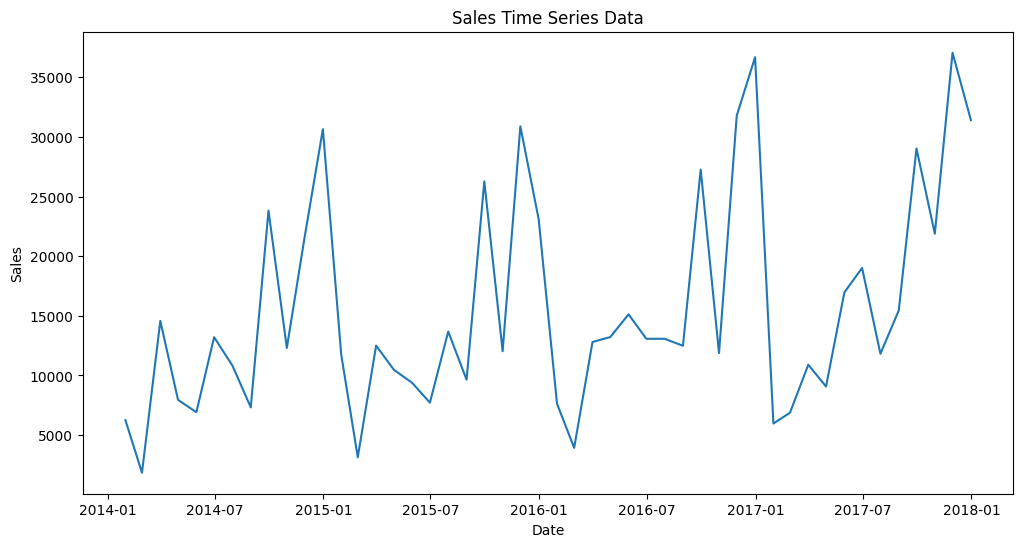

Checking mean and variance in different parts of data
Mean (First Half): 13654.628754166666, Mean (Second Half): 17262.02938333333
Variance (First Half): 66140355.341823466, Variance (Second Half): 96431892.43689558
ADF Fuller Test for stationarity
ADF Statistic: -4.699026242828903
p-value: 8.450793985809654e-05
Critical Values: {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}
Rolling mean original


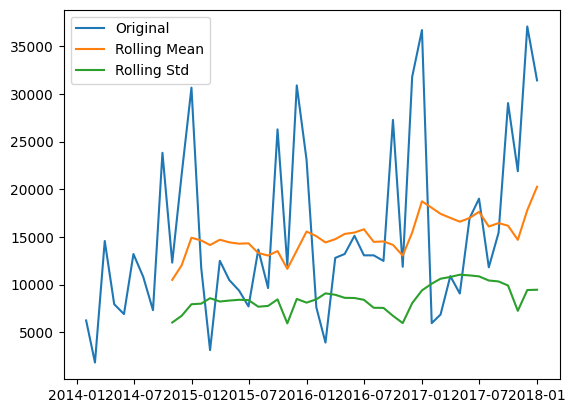


Rolling mean lag 1


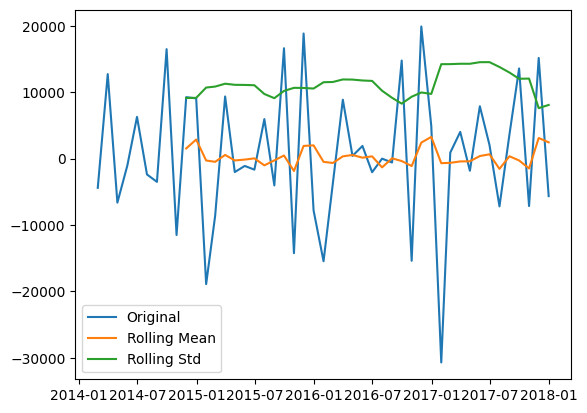


Rolling mean lag 1


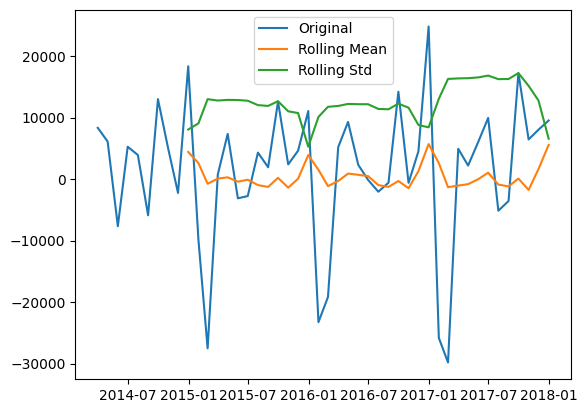


Rolling mean lag 1


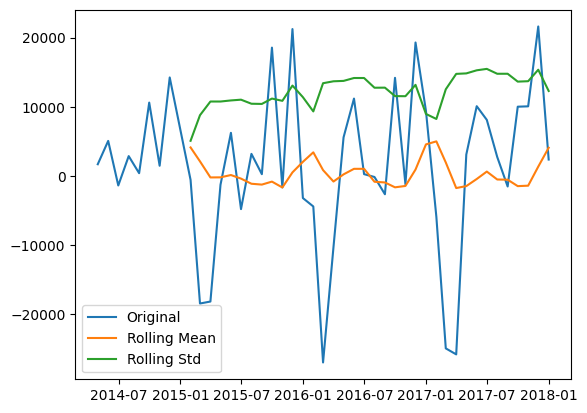


ACF and PACF


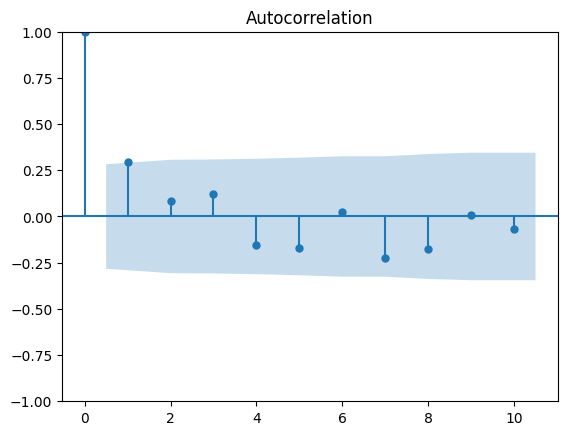

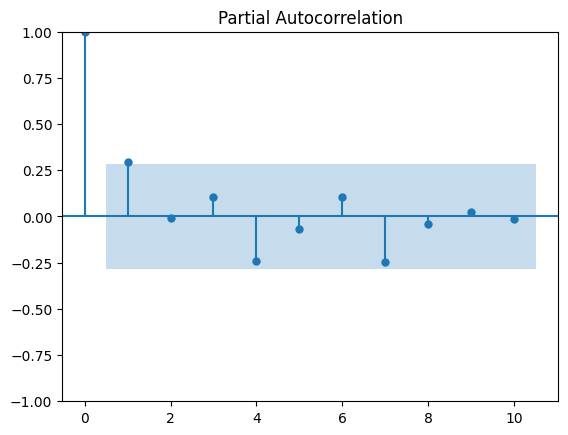

In [19]:
arima_model_preprocess(df_furniture_monthly)

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   40
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -409.811
Date:                Fri, 25 Jul 2025   AIC                            825.622
Time:                        00:41:19   BIC                            830.613
Sample:                    01-31-2014   HQIC                           827.413
                         - 04-30-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2491      0.141      1.769      0.077      -0.027       0.525
ma.L1         -0.9957      0.255     -3.898      0.000      -1.496      -0.495
sigma2      7.341e+07   3.99e-09   1.84e+16      0.0

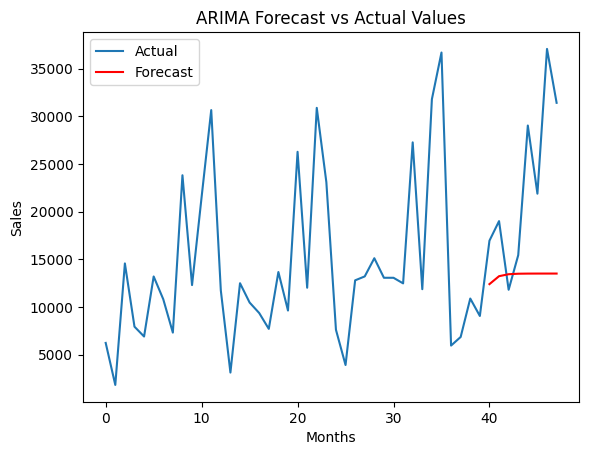

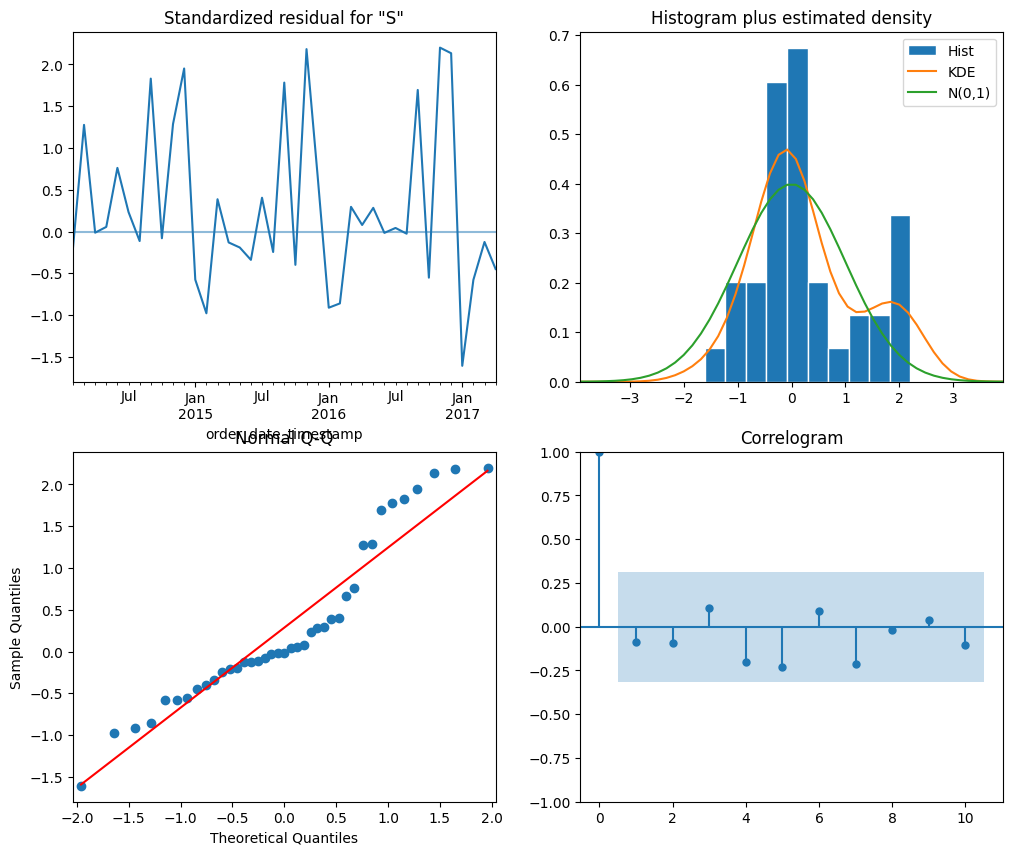

In [20]:
# Calculate the split point for training and test sets
split = len(df_furniture_monthly) * 85 // 100

# Split the data into training and test sets
train, test = df_furniture_monthly[:split], df_furniture_monthly[split:]

train = train.copy()
train.index = pd.DatetimeIndex(train.index)  
train.index.freq = 'ME'  

test = test.copy()
test.index = pd.DatetimeIndex(test.index)
test.index.freq = 'ME'

# Fit the ARIMA model on the training data
model = ARIMA(train['Sales'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# Specify the start and end dates for the forecast
start_date = test.index[0]
end_date = test.index[-1]

# Make predictions starting from the specified date
forecast = model_fit.get_prediction(start=start_date, end=end_date)

# Plot actual values
py.plot(range(0, len(df_furniture_monthly)), df_furniture_monthly['Sales'], label='Actual')

# Plot predicted values
py.plot(range(split, len(df_furniture_monthly)), forecast.predicted_mean, color='red', label='Forecast')

# Set plot labels and legend
py.xlabel('Months')
py.ylabel('Sales')
py.title('ARIMA Forecast vs Actual Values')
py.legend()

# Plot diagnostics
model_fit.plot_diagnostics(figsize=(12, 10))
py.show()

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

predicted_values = forecast.predicted_mean

# Extract the actual values from the test set
actual_values = test['Sales']

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

# Calculate MAPE
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Root Mean Squared Error (RMSE): 12480.382890859586
Mean Absolute Percentage Error (MAPE): 36.98321530544499


In [22]:
compare_arima(train)

Auto ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:                        SARIMAX   Log Likelihood                -418.279
Date:                Fri, 25 Jul 2025   AIC                            840.559
Time:                        00:41:22   BIC                            843.937
Sample:                    01-31-2014   HQIC                           841.780
                         - 04-30-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.399e+04   1899.241      7.363      0.000    1.03e+04    1.77e+04
sigma2      7.085e+07    2.1e+07      3.367      0.001    2.96e+07    1.12e+08
Ljung-Box (L1) (Q):       

C:\Users\MayankKumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\MayankKumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\MayankKumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\MayankKumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

(0, 3, 3) 800.1405733831942


C:\Users\MayankKumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\MayankKumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\MayankKumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\MayankKumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   40
Model:                 ARIMA(3, 3, 3)   Log Likelihood                -400.217
Date:                Fri, 25 Jul 2025   AIC                            814.434
Time:                        00:41:34   BIC                            825.710
Sample:                    01-31-2014   HQIC                           818.409
                         - 04-30-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7363      0.194     -8.942      0.000      -2.117      -1.356
ar.L2         -1.7232      0.201     -8.588      0.000      -2.116      -1.330
ar.L3         -0.6958      0.200     -3.486      0.0

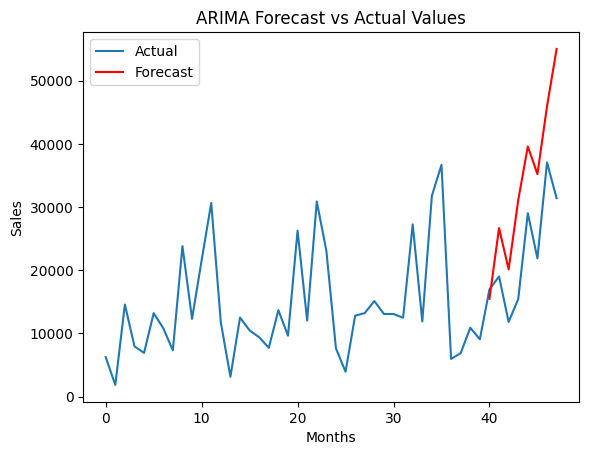

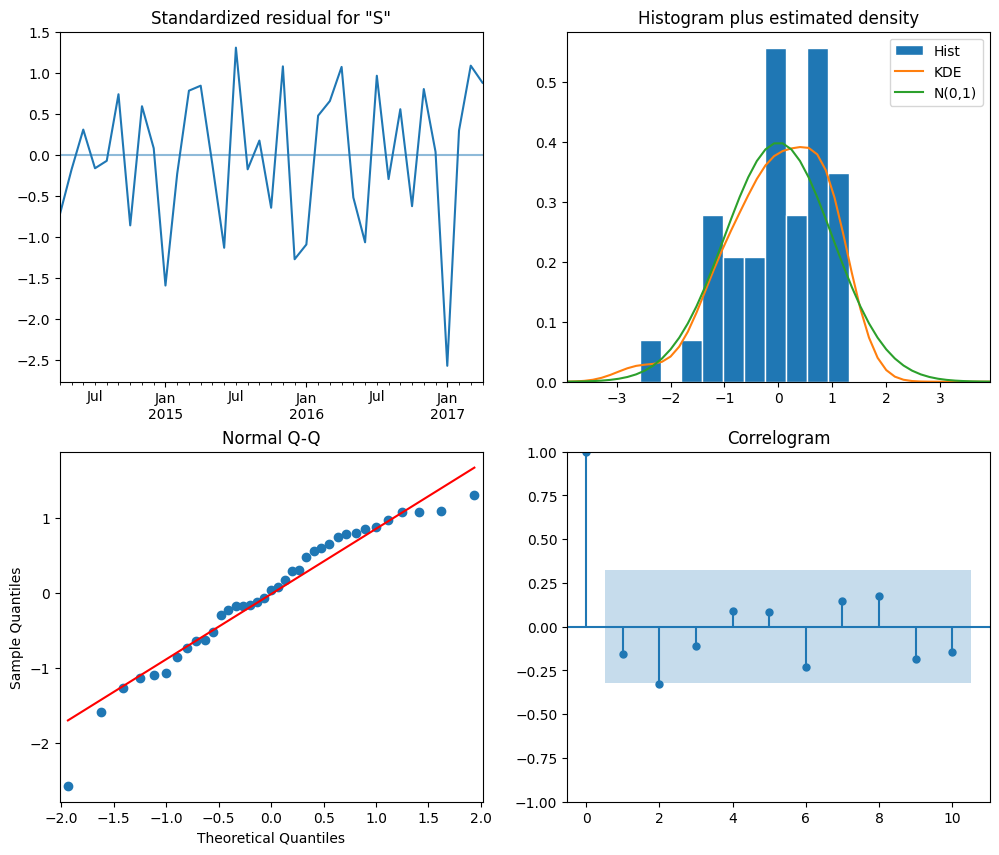

In [23]:
# Calculate the split point for training and test sets
split = len(df_furniture_monthly) * 85 // 100

# Split the data into training and test sets
train, test = df_furniture_monthly[:split], df_furniture_monthly[split:]

# Fit the ARIMA model on the training data
model = ARIMA(train['Sales'], order=(3, 3, 3))
model_fit = model.fit()
print(model_fit.summary())

# Specify the start and end dates for the forecast
start_date = test.index[0]
end_date = test.index[-1]

# Make predictions starting from the specified date
forecast = model_fit.get_prediction(start=start_date, end=end_date)

# Plot actual values
py.plot(range(0, len(df_furniture_monthly)), df_furniture_monthly['Sales'], label='Actual')

# Plot predicted values
py.plot(range(split, len(df_furniture_monthly)), forecast.predicted_mean, color='red', label='Forecast')

# Set plot labels and legend
py.xlabel('Months')
py.ylabel('Sales')
py.title('ARIMA Forecast vs Actual Values')
py.legend()

# Plot diagnostics
model_fit.plot_diagnostics(figsize=(12, 10))
py.show()

In [24]:
predicted_values = forecast.predicted_mean

# Extract the actual values from the test set
actual_values = test['Sales']

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

# Calculate MAPE
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Root Mean Squared Error (RMSE): 12756.758647651282
Mean Absolute Percentage Error (MAPE): 52.17258467416321


# Box Cox Transformation

Optimal Lambda: 0.2817091467486813


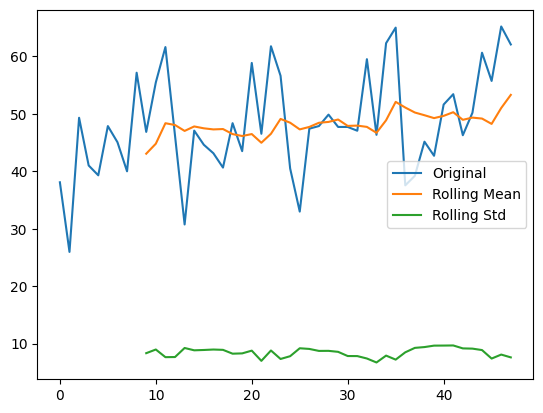

In [25]:
from scipy.stats import boxcox

# Assuming df_furniture_weekly is a time series DataFrame with a 'Sales' column
original_sales = df_furniture_monthly['Sales']
# Apply Box-Cox transformation and find the optimal lambda
transformed_sales, lambda_value = boxcox(original_sales)
# Print the optimal lambda value
print("Optimal Lambda:", lambda_value)
transformed_df = pd.DataFrame(transformed_sales)

rolling_mean = transformed_df.rolling(window=10).mean()
rolling_std = transformed_df.rolling(window=10).std()
py.plot(transformed_df, label='Original')
py.plot(rolling_mean, label='Rolling Mean')
py.plot(rolling_std, label='Rolling Std')
py.legend()
py.show()

In [26]:
# Dropping Order ID , Row ID , Customer Name , Product ID , Product Name as the columns are not relevant for our purpose
# Dropping Counntry column as it has the same value throughout
df = superstore_df.drop(["Order ID", "Row ID", "Customer Name", "Country", "Product ID", "Product Name"], axis = 1)

In [27]:
df.head()

Order Date   Ship Date       Ship Mode Customer ID    Segment  \
0   11/8/2016  11/11/2016    Second Class    CG-12520   Consumer   
1   11/8/2016  11/11/2016    Second Class    CG-12520   Consumer   
2   6/12/2016   6/16/2016    Second Class    DV-13045  Corporate   
3  10/11/2015  10/18/2015  Standard Class    SO-20335   Consumer   
4  10/11/2015  10/18/2015  Standard Class    SO-20335   Consumer   

              City       State  Postal Code Region         Category  \
0        Henderson    Kentucky        42420  South        Furniture   
1        Henderson    Kentucky        42420  South        Furniture   
2      Los Angeles  California        90036   West  Office Supplies   
3  Fort Lauderdale     Florida        33311  South        Furniture   
4  Fort Lauderdale     Florida        33311  South  Office Supplies   

  Sub-Category     Sales  Quantity  Discount    Profit order_date_timestamp  
0    Bookcases  261.9600         2      0.00   41.9136           2016-11-08  
1       Chairs  731.9400         3      0.00  219.5820           2016-11-08  
2       Labels   14.6200         2      0.00    6.8714           2016-06-12  
3       Tables  957.5775         5      0.45 -383.0310           2015-10-11  
4      Storage   22.3680         2      0.20    2.5164           2015-10-11

# Outlier Detection and Removal

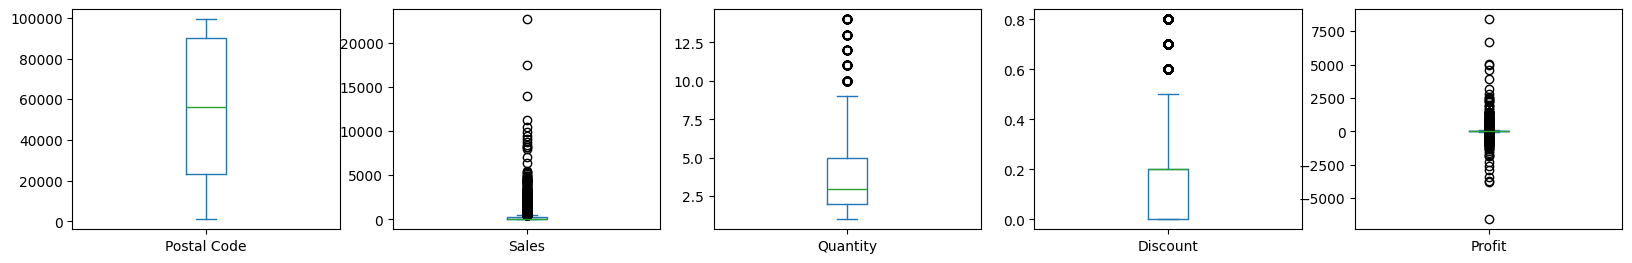

In [28]:
df.plot(kind='box', subplots=True, figsize=(20,20), layout=(6,5))
py.show()

In [29]:
def drop_outliers_any(df, columns):
    mask = pd.Series([True] * df.shape[0])  # All rows included initially
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        mask &= (df[col] >= lower_bound) & (df[col] <= upper_bound)
        print(f"{col}: kept values in [{lower_bound:.2f}, {upper_bound:.2f}]")

    return df[mask]

In [30]:
%matplotlib inline

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

def compare_boxplots(df_before, df_after, columns):
    for col in columns:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        
        sns.boxplot(x=df_before[col], ax=axes[0])
        axes[0].set_title(f'{col} - Before')
        
        sns.boxplot(x=df_after[col], ax=axes[1])
        axes[1].set_title(f'{col} - After')
        
        plt.tight_layout()
        plt.show()  

Sales: kept values in [-271.71, 498.93]
Profit: kept values in [-39.72, 70.82]
Quantity: kept values in [-2.50, 9.50]
Discount: kept values in [-0.30, 0.50]


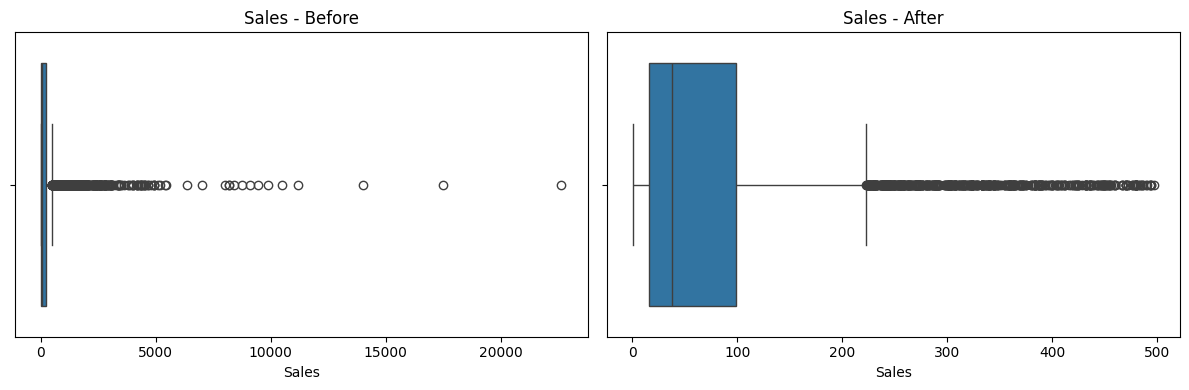

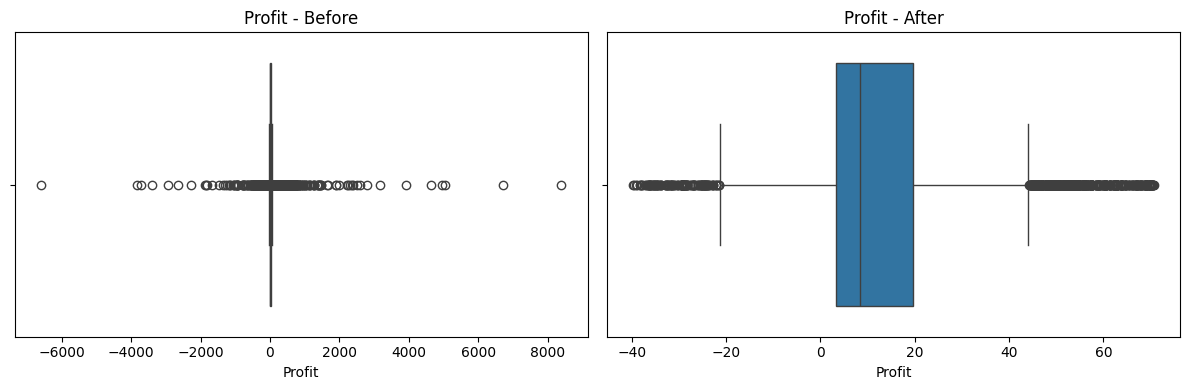

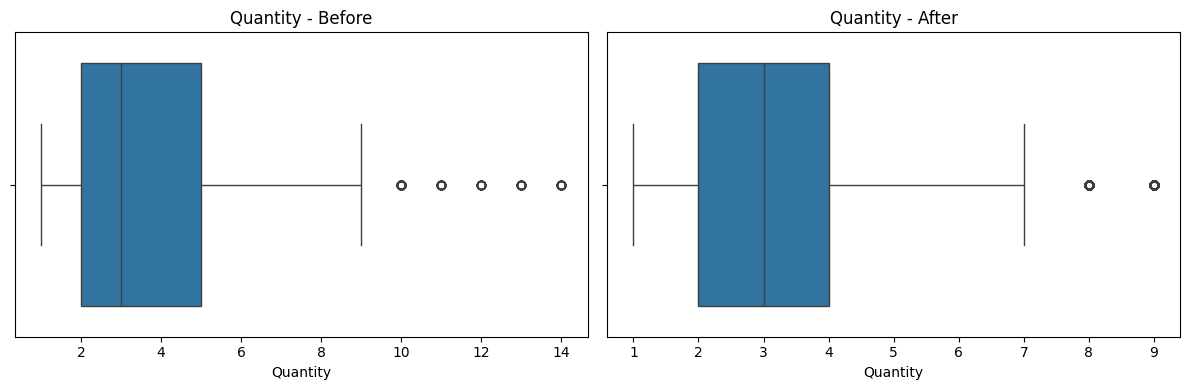

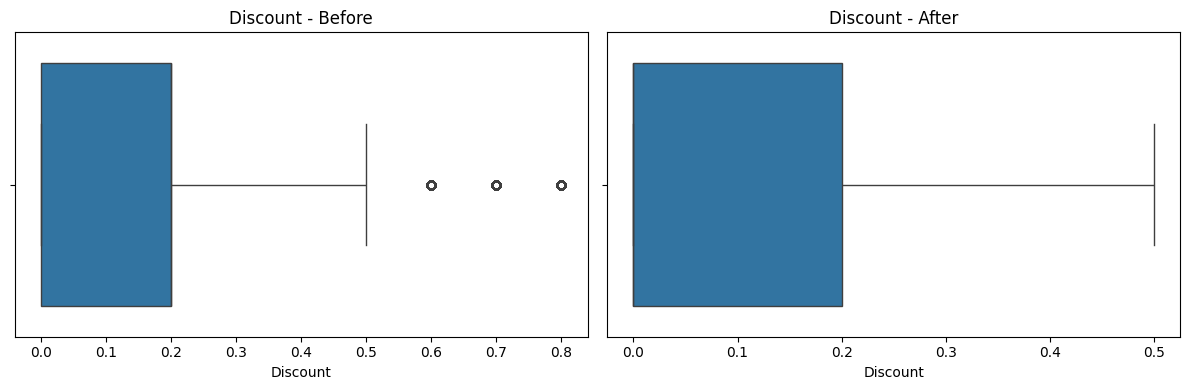

In [32]:
columns_to_check = ['Sales', 'Profit', 'Quantity', 'Discount']

# Drop outliers
df_cleaned = drop_outliers_any(df, columns_to_check).copy()
# Compare boxplots
compare_boxplots(df, df_cleaned, columns_to_check)

In [33]:
df.shape[0]

9994

In [34]:
df_cleaned.shape[0]

7143

# Feature Engineering

In [35]:
# Convert Order Date and Ship Date to Date Time Variables 
d = datetime.datetime.strptime('2011-06-09', '%Y-%m-%d')
d.strftime('%b %d,%Y')
df_cleaned["Order Date"] = df_cleaned['Order Date'].astype('datetime64[ns]')
df_cleaned["Ship Date"] = pd.to_datetime(df_cleaned["Ship Date"])
df_cleaned["Order Date"] = pd.to_datetime(df_cleaned["Order Date"], format = "%m/%d/%Y")
df_cleaned["Ship Date"] = pd.to_datetime(df_cleaned["Ship Date"], format = "%m/%d/%Y")

In [36]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7143 entries, 0 to 9992
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order Date            7143 non-null   datetime64[ns]
 1   Ship Date             7143 non-null   datetime64[ns]
 2   Ship Mode             7143 non-null   object        
 3   Customer ID           7143 non-null   object        
 4   Segment               7143 non-null   object        
 5   City                  7143 non-null   object        
 6   State                 7143 non-null   object        
 7   Postal Code           7143 non-null   int64         
 8   Region                7143 non-null   object        
 9   Category              7143 non-null   object        
 10  Sub-Category          7143 non-null   object        
 11  Sales                 7143 non-null   float64       
 12  Quantity              7143 non-null   int64         
 13  Discount              7

#### Get month, year, and date columns 

In [37]:
df_cleaned['MonthO'] = df_cleaned['Order Date'].dt.month
df_cleaned['YearO'] = df_cleaned['Order Date'].dt.year
df_cleaned["DayO"] = df_cleaned["Order Date"].dt.weekday
df_cleaned

Order Date  Ship Date       Ship Mode Customer ID    Segment  \
0    2016-11-08 2016-11-11    Second Class    CG-12520   Consumer   
2    2016-06-12 2016-06-16    Second Class    DV-13045  Corporate   
4    2015-10-11 2015-10-18  Standard Class    SO-20335   Consumer   
5    2014-06-09 2014-06-14  Standard Class    BH-11710   Consumer   
6    2014-06-09 2014-06-14  Standard Class    BH-11710   Consumer   
...         ...        ...             ...         ...        ...   
9988 2017-11-17 2017-11-21  Standard Class    RA-19885  Corporate   
9989 2014-01-21 2014-01-23    Second Class    TB-21400   Consumer   
9990 2017-02-26 2017-03-03  Standard Class    DB-13060   Consumer   
9991 2017-02-26 2017-03-03  Standard Class    DB-13060   Consumer   
9992 2017-02-26 2017-03-03  Standard Class    DB-13060   Consumer   

                 City       State  Postal Code Region         Category  \
0           Henderson    Kentucky        42420  South        Furniture   
2         Los Angeles  California        90036   West  Office Supplies   
4     Fort Lauderdale     Florida        33311  South  Office Supplies   
5         Los Angeles  California        90032   West        Furniture   
6         Los Angeles  California        90032   West  Office Supplies   
...               ...         ...          ...    ...              ...   
9988           Athens     Georgia        30605  South       Technology   
9989            Miami     Florida        33180  South        Furniture   
9990       Costa Mesa  California        92627   West        Furniture   
9991       Costa Mesa  California        92627   West       Technology   
9992       Costa Mesa  California        92627   West  Office Supplies   

     Sub-Category    Sales  Quantity  Discount   Profit order_date_timestamp  \
0       Bookcases  261.960         2       0.0  41.9136           2016-11-08   
2          Labels   14.620         2       0.0   6.8714           2016-06-12   
4         Storage   22.368         2       0.2   2.5164           2015-10-11   
5     Furnishings   48.860         7       0.0  14.1694           2014-06-09   
6             Art    7.280         4       0.0   1.9656           2014-06-09   
...           ...      ...       ...       ...      ...                  ...   
9988       Phones  206.100         5       0.0  55.6470           2017-11-17   
9989  Furnishings   25.248         3       0.2   4.1028           2014-01-21   
9990  Furnishings   91.960         2       0.0  15.6332           2017-02-26   
9991       Phones  258.576         2       0.2  19.3932           2017-02-26   
9992        Paper   29.600         4       0.0  13.3200           2017-02-26   

      MonthO  YearO  DayO  
0         11   2016     1  
2          6   2016     6  
4         10   2015     6  
5          6   2014     0  
6          6   2014     0  
...      ...    ...   ...  
9988      11   2017     4  
9989       1   2014     1  
9990       2   2017     6  
9991       2   2017     6  
9992       2   2017     6  

[7143 rows x 19 columns]

In [38]:
df_cleaned["Order to Ship"] = df_cleaned["Ship Date"] - df_cleaned["Order Date"]
# df = df.drop(["Order Date", "Ship Date"], axis = 1)

In [39]:
df_cleaned

Order Date  Ship Date       Ship Mode Customer ID    Segment  \
0    2016-11-08 2016-11-11    Second Class    CG-12520   Consumer   
2    2016-06-12 2016-06-16    Second Class    DV-13045  Corporate   
4    2015-10-11 2015-10-18  Standard Class    SO-20335   Consumer   
5    2014-06-09 2014-06-14  Standard Class    BH-11710   Consumer   
6    2014-06-09 2014-06-14  Standard Class    BH-11710   Consumer   
...         ...        ...             ...         ...        ...   
9988 2017-11-17 2017-11-21  Standard Class    RA-19885  Corporate   
9989 2014-01-21 2014-01-23    Second Class    TB-21400   Consumer   
9990 2017-02-26 2017-03-03  Standard Class    DB-13060   Consumer   
9991 2017-02-26 2017-03-03  Standard Class    DB-13060   Consumer   
9992 2017-02-26 2017-03-03  Standard Class    DB-13060   Consumer   

                 City       State  Postal Code Region         Category  \
0           Henderson    Kentucky        42420  South        Furniture   
2         Los Angeles  California        90036   West  Office Supplies   
4     Fort Lauderdale     Florida        33311  South  Office Supplies   
5         Los Angeles  California        90032   West        Furniture   
6         Los Angeles  California        90032   West  Office Supplies   
...               ...         ...          ...    ...              ...   
9988           Athens     Georgia        30605  South       Technology   
9989            Miami     Florida        33180  South        Furniture   
9990       Costa Mesa  California        92627   West        Furniture   
9991       Costa Mesa  California        92627   West       Technology   
9992       Costa Mesa  California        92627   West  Office Supplies   

     Sub-Category    Sales  Quantity  Discount   Profit order_date_timestamp  \
0       Bookcases  261.960         2       0.0  41.9136           2016-11-08   
2          Labels   14.620         2       0.0   6.8714           2016-06-12   
4         Storage   22.368         2       0.2   2.5164           2015-10-11   
5     Furnishings   48.860         7       0.0  14.1694           2014-06-09   
6             Art    7.280         4       0.0   1.9656           2014-06-09   
...           ...      ...       ...       ...      ...                  ...   
9988       Phones  206.100         5       0.0  55.6470           2017-11-17   
9989  Furnishings   25.248         3       0.2   4.1028           2014-01-21   
9990  Furnishings   91.960         2       0.0  15.6332           2017-02-26   
9991       Phones  258.576         2       0.2  19.3932           2017-02-26   
9992        Paper   29.600         4       0.0  13.3200           2017-02-26   

      MonthO  YearO  DayO Order to Ship  
0         11   2016     1        3 days  
2          6   2016     6        4 days  
4         10   2015     6        7 days  
5          6   2014     0        5 days  
6          6   2014     0        5 days  
...      ...    ...   ...           ...  
9988      11   2017     4        4 days  
9989       1   2014     1        2 days  
9990       2   2017     6        5 days  
9991       2   2017     6        5 days  
9992       2   2017     6        5 days  

[7143 rows x 20 columns]

#### Dummy Variable for Categorical Column Values

In [40]:
# One Hot Encoding of categorical column values
df_cleaned = pd.get_dummies(df_cleaned, columns = ["Segment", "Category", "Region", "Ship Mode"], dtype = int)

In [41]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7143 entries, 0 to 9992
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   Order Date                7143 non-null   datetime64[ns] 
 1   Ship Date                 7143 non-null   datetime64[ns] 
 2   Customer ID               7143 non-null   object         
 3   City                      7143 non-null   object         
 4   State                     7143 non-null   object         
 5   Postal Code               7143 non-null   int64          
 6   Sub-Category              7143 non-null   object         
 7   Sales                     7143 non-null   float64        
 8   Quantity                  7143 non-null   int64          
 9   Discount                  7143 non-null   float64        
 10  Profit                    7143 non-null   float64        
 11  order_date_timestamp      7143 non-null   datetime64[ns] 
 12  MonthO     

In [42]:
# Remove one colums for each new created column 
df_cleaned = df_cleaned.drop(["Segment_Home Office", "Category_Technology", "Region_West", "Ship Mode_Standard Class"], axis = 1)

## Exploratory Data Analysis 

### 1. Plot for number of Orders by State 

In [43]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [44]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'notebook' 

# Create new column with State Abbreviations
df_cleaned['State_abb'] = df_cleaned['State'].replace(us_state_to_abbrev)

# Plot
fig = go.Figure(data=go.Choropleth(
    locations= df_cleaned['State_abb'].value_counts().index, # Spatial coordinates
    z = df_cleaned['State_abb'].value_counts(), # Data to be color-coded
    locationmode = 'USA-states',
    colorscale = 'tropic_r', zmin = 1, zmax = 1000
))

fig.update_layout(
    font = dict(
            size = 12
            ),    
    title={
        'text': "Number of Orders by State",
        'y':0.95,
        'x':0.5
        },
    geo_scope='usa', # limite map scope to USA
)

fig.show()

## 2. Plot for number of Sales by State 

In [45]:
sales_data = df_cleaned.groupby('State')['Sales'].sum().sort_values(ascending=False)
sales_data = pd.DataFrame(sales_data)
sales_data.reset_index(inplace = True)
sales_data['State_abb'] = sales_data['State'].replace(us_state_to_abbrev)

In [46]:
sales_data.columns

Index(['State', 'Sales', 'State_abb'], dtype='object')

In [47]:

import plotly.express as px
# create choropleth map for the data
# color will be the column to be color-coded
# locations is the column with sppatial coordinates
fig = px.choropleth(sales_data, locations='State_abb',
                    locationmode="USA-states", color='Sales', scope="usa")
fig.update_layout(
    font = dict(
            size = 12
            ),    
    title={
        'text': "Total Sales by State",
        'y':0.95,
        'x':0.5
        },
    geo_scope='usa', # limit map scope to USA
)

fig.show()

In [48]:
# plotting top 10 states by sales 
sales_data_10 = sales_data.iloc[:10,:]
fig = px.bar(sales_data_10, x = 'State', y = 'Sales', title = 'Sales of Top 10 States')
fig.update_layout(
    xaxis_title="State",
    yaxis_title="Sales",
    showlegend = True,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Sales of Top 10 States",
        'y':0.95,
        'x':0.5
        }
    )
fig.show()

In [49]:
df_cleaned.groupby('State')['Sales'].sum().sort_values(ascending=False).tail(10)

State
Kansas                  1684.090
Nebraska                1312.850
Iowa                    1039.640
Montana                  757.958
South Dakota             509.270
Vermont                  407.290
Maine                    317.520
District of Columbia     217.570
North Dakota             193.650
West Virginia             88.640
Name: Sales, dtype: float64

## 3. Plot for Number of Orders by Weekday

In [50]:
day_data = df_cleaned.groupby('DayO')['Sales'].count().sort_values(ascending=False)
day_data = pd.DataFrame(day_data)
day_data.reset_index(inplace = True)
fig = px.bar(x = day_data['DayO'], y = day_data['Sales'], title = 'Number of Orders by Weekday')
fig.update_layout(
    xaxis_title="Weekday",
    yaxis_title="Number of Orders",
    showlegend = True,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Number of Orders by Weekday",
        'y':0.95,
        'x':0.5
        }
    )
fig.show()

## 4. Plot for number of Sales by Weekday

In [51]:
day_data = df_cleaned.groupby('DayO')['Sales'].sum().sort_values(ascending=False)
day_data = pd.DataFrame(day_data)
day_data.reset_index(inplace = True)
fig = px.bar(x = day_data['DayO'], y = day_data['Sales'], title = 'Sales by Weekday')
fig.update_layout(
    xaxis_title="State",
    yaxis_title="Sales",
    showlegend = True,
    #xlabel = ["Sunday", "Monday", 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
    font = dict(
            size = 14
            ),    
    title={
        'text': "Sales by Weekday",
        'y':0.95,
        'x':0.5
        }
    )
fig.show()

## 5. Statewise Distribution of Shipping Mode

In [52]:
state_ship_mode_counts = superstore_df.groupby(['State', 'Ship Mode']).size().reset_index(name='Count')
fig = px.treemap(state_ship_mode_counts, path=['State', 'Ship Mode'], values='Count')
fig.update_layout( title='Treemap of State vs. Ship Mode',title_x=0.45,width=1600,title_font=dict(size=24, family="Arial", color="black"))
fig.show()

## 6.Top profitable products 

In [53]:
superstore_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'order_date_timestamp'],
      dtype='object')

In [54]:
day_data = superstore_df.groupby(['Category','Sub-Category'], as_index = False)['Profit'].sum()
day_data = pd.DataFrame(day_data)
day_data.reset_index(inplace = True)
#fig = px.bar(x = day_data['Sub-Category'], y = day_data['Profit'], title = 'Profit by Sub-Category')
fig = px.bar(x = day_data['Profit'],
             y = day_data['Sub-Category'],
             color = day_data['Category'],
             orientation = 'h',
             template = 'simple_white')
fig.update_layout(
    xaxis_title="Profit",
    yaxis_title="Sub-Category",
    legend_title="Category",
    showlegend = True,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Profit by Category & Sub-Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

# Dummy Linear Model 

## Model 1: Predicting Sales using Quantity and Profit 

In [55]:
X = df[['Quantity',
       'Profit']]
Y = df["Sales"]

In [56]:
import statsmodels.api as sm
import sklearn.linear_model

In [57]:
lr = sklearn.linear_model.LinearRegression() #Pipeline([('std_scaler', StandardScaler()),('linear_regressor',LinearRegression(normalize=True,fit_intercept=False))])
lr.fit(X, Y)
print("linear regression")
print('Accuracy: ', lr.score(X, Y))
print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

linear regression
Accuracy:  0.258208325245589
Intercept: 
 13.957169348919962
Coefficients: 
 [47.560519    1.24461271]
                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.347
Model:                            OLS   Adj. R-squared (uncentered):              0.347
Method:                 Least Squares   F-statistic:                              2654.
Date:                Fri, 25 Jul 2025   Prob (F-statistic):                        0.00
Time:                        00:41:42   Log-Likelihood:                         -76999.
No. Observations:                9994   AIC:                                  1.540e+05
Df Residuals:                    9992   BIC:                                  1.540e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  

## Error Assumption 

## 1. Linearity 

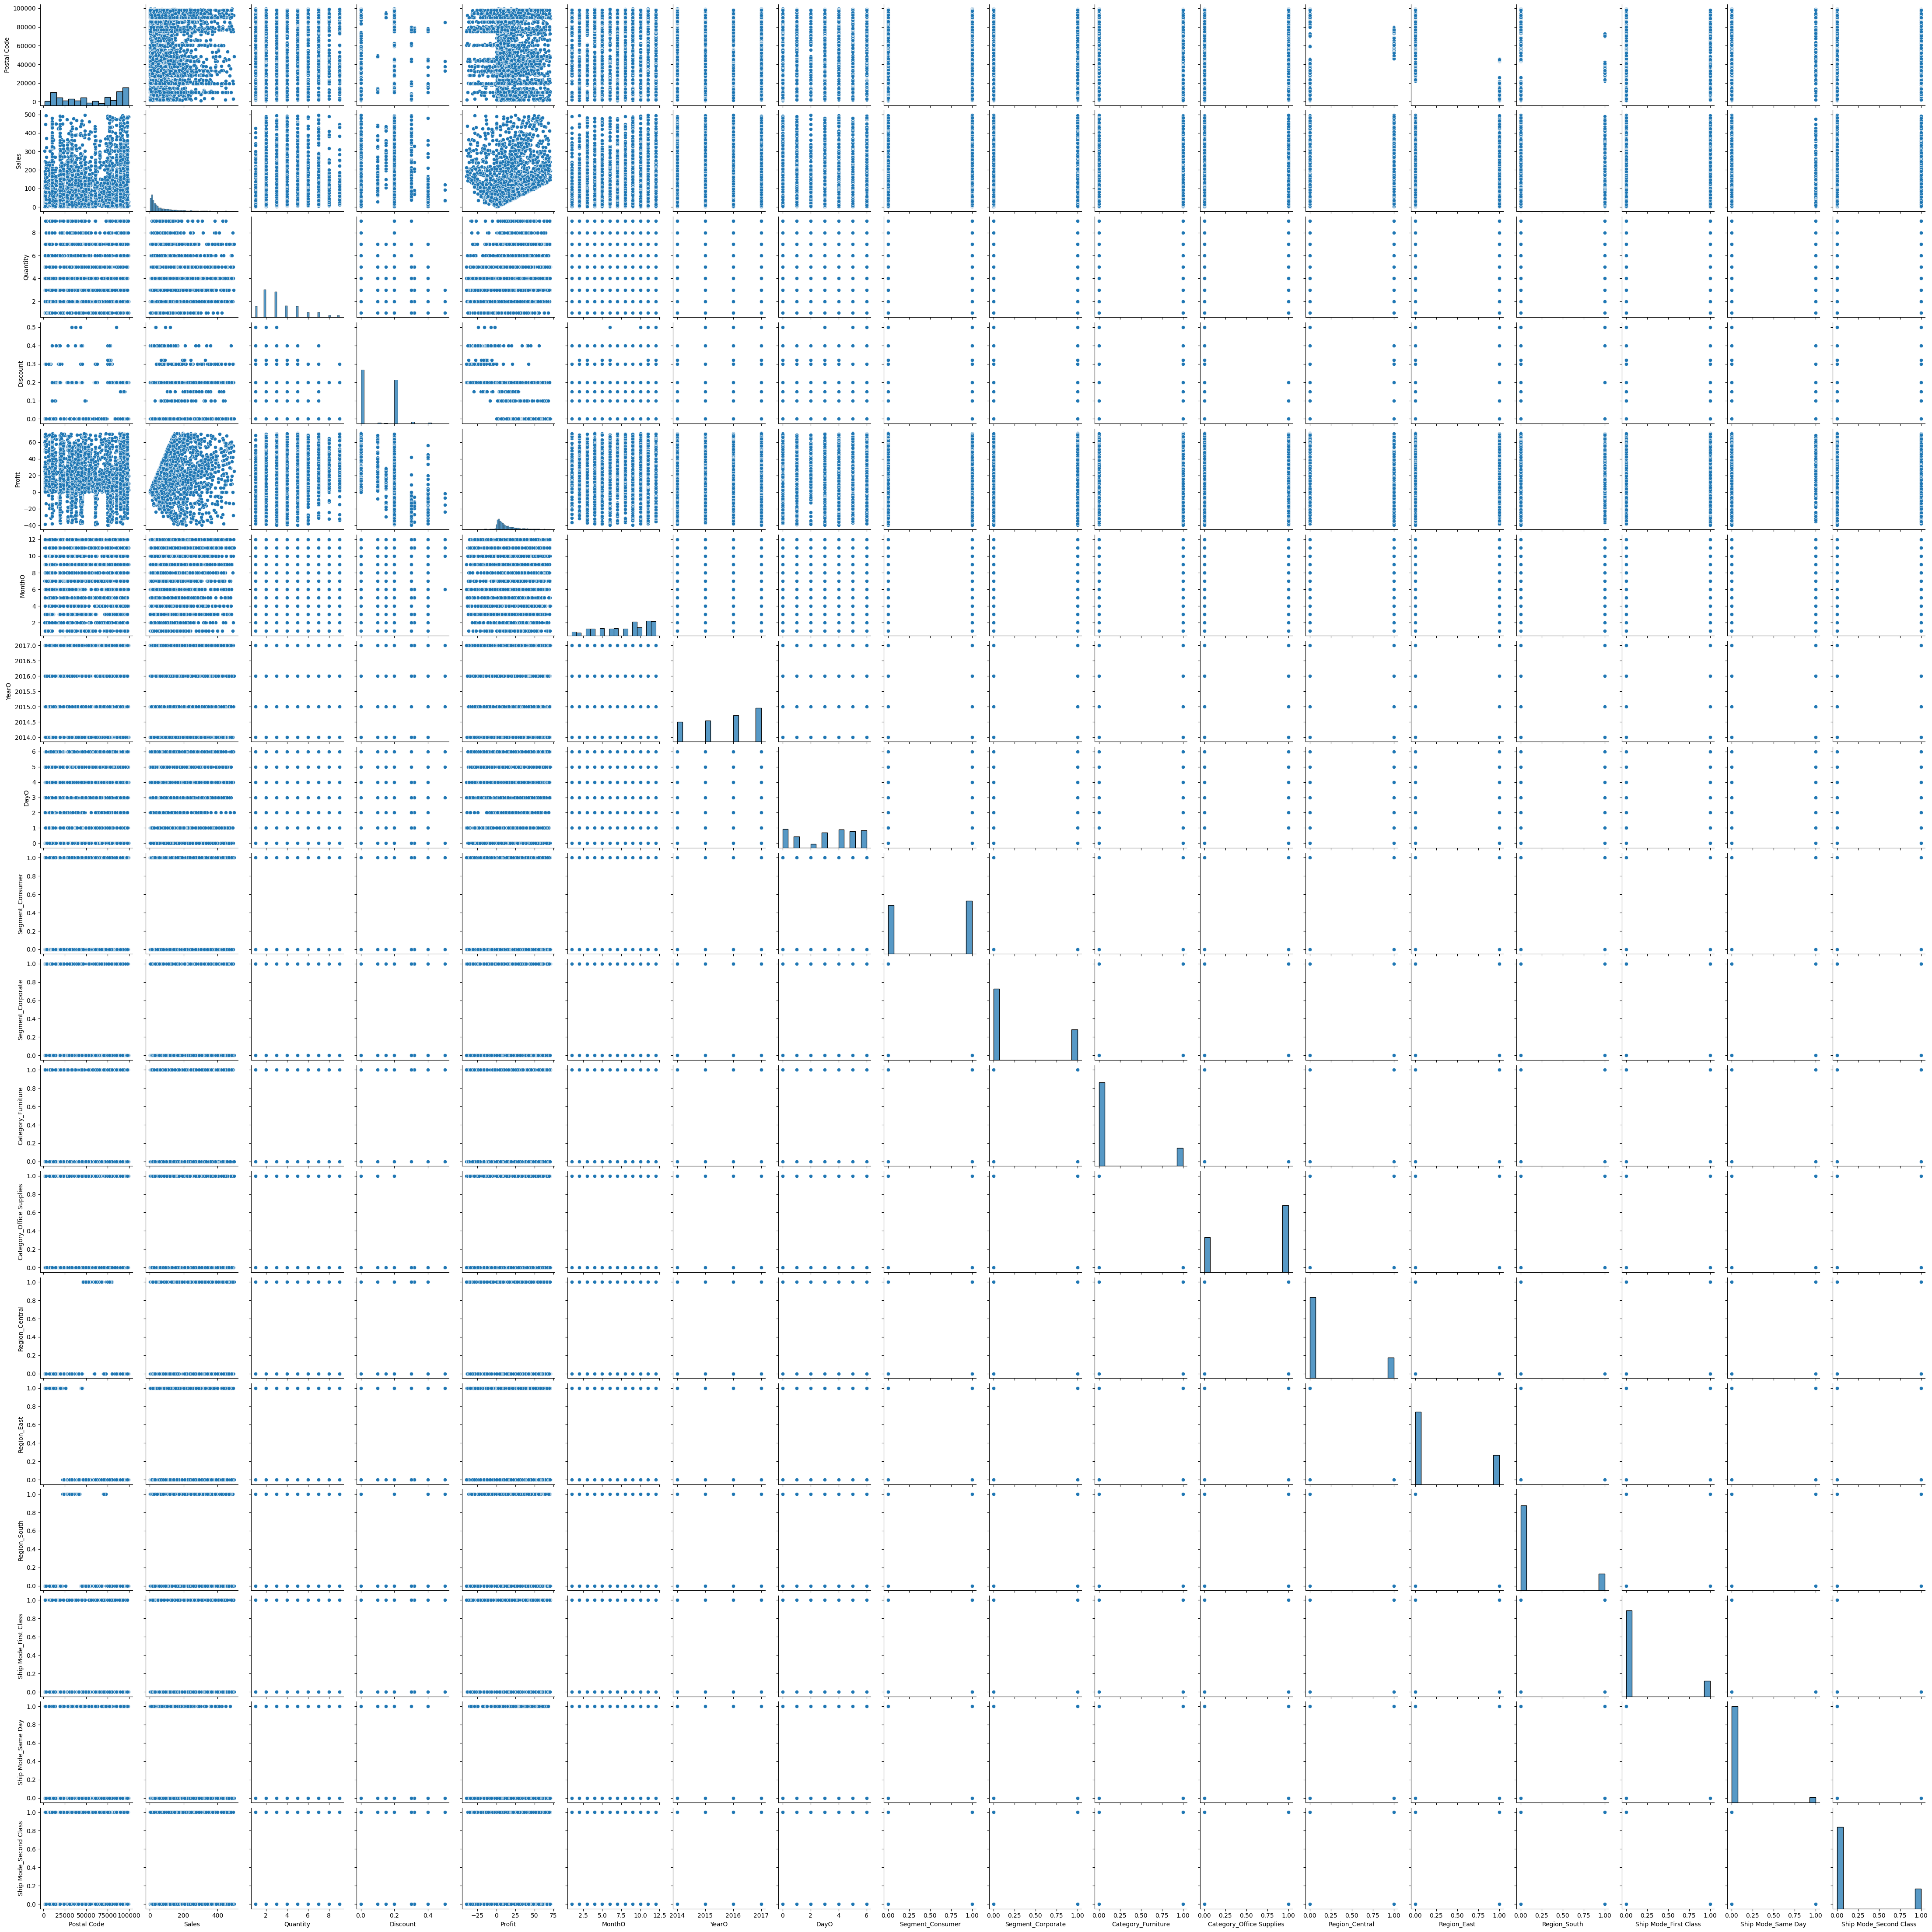

In [58]:
p = sns.pairplot(df_cleaned)

## 2. Multicollinearity 

In [59]:
data = df_cleaned[["Profit", "Quantity", "Discount"]]

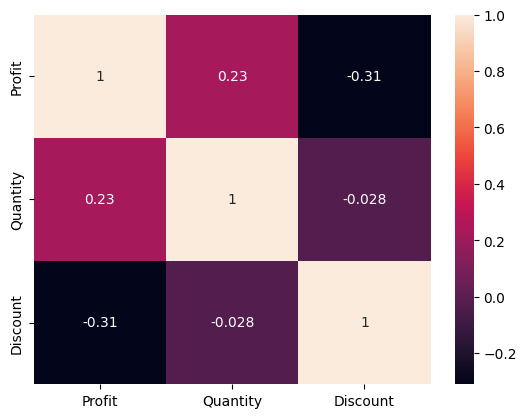

In [60]:
#plotting the heatmap for correlation
ax = sns.heatmap(data.corr(), annot=True)

# Final Code

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df_cleaned.columns:
    if(df_cleaned.dtypes[i] == 'object'):
        df_cleaned[i] = le.fit_transform(df_cleaned[i])

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7143 entries, 0 to 9992
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   Order Date                7143 non-null   datetime64[ns] 
 1   Ship Date                 7143 non-null   datetime64[ns] 
 2   Customer ID               7143 non-null   int32          
 3   City                      7143 non-null   int32          
 4   State                     7143 non-null   int32          
 5   Postal Code               7143 non-null   int64          
 6   Sub-Category              7143 non-null   int32          
 7   Sales                     7143 non-null   float64        
 8   Quantity                  7143 non-null   int64          
 9   Discount                  7143 non-null   float64        
 10  Profit                    7143 non-null   float64        
 11  order_date_timestamp      7143 non-null   datetime64[ns] 
 12  MonthO     

In [62]:
df_cleaned = df_cleaned.drop(["Order to Ship","Order Date","Ship Date","order_date_timestamp"], axis = 1)

In [63]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score #cross validation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
#using standard scaler 
sc = StandardScaler()
x = df_cleaned.drop(['Sales'] , axis = 1).values
y =df_cleaned['Sales'].values

#train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [64]:
model = sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.223
Model:                            OLS   Adj. R-squared (uncentered):              0.220
Method:                 Least Squares   F-statistic:                              74.07
Date:                Fri, 25 Jul 2025   Prob (F-statistic):                   1.92e-290
Time:                        00:43:39   Log-Likelihood:                         -34681.
No. Observations:                5714   AIC:                                  6.941e+04
Df Residuals:                    5692   BIC:                                  6.955e+04
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.5503      1.395     -1.111      0.267      -4.285       1.185
x2             0.5965      1.504      0.397      0.692      -2.352       3.545
x3           -24.3587     19.088     -1.276      0.202     -61.779      13.061
x4            -9.7912      4.957     -1.975      0.048     -19.509      -0.073
x5             8.9802      1.403      6.403      0.000       6.231      11.730
x6             5.4096      1.435      3.769      0.000       2.596       8.223
x7            22.7300      1.610     14.114      0.000      19.573      25.887
x8            40.8084      1.528     26.702      0.000      37.812      43.804
x9            -1.0081      1.391     -0.724      0.469      -3.736       1.720
x10           -0.9402      1.393     -0.675      0.500      -3.670       1.790
x11            1.1657      1.393      0.837      0.403      -1.564       3.896
x12            2.3465      1.903      1.233      0.218      -1.385       6.078
x13            0.3693      1.907      0.194      0.846      -3.369       4.107
x14            9.2433      1.848      5.002      0.000       5.621      12.866
x15          -26.5792      1.880    -14.138      0.000     -30.265     -22.894
x16           -4.8440      2.590     -1.871      0.061      -9.920       0.232
x17          -15.2612      5.621     -2.715      0.007     -26.280      -4.243
x18           -8.9933      3.672     -2.449      0.014     -16.193      -1.794
x19           -0.5635      1.434     -0.393      0.694      -3.375       2.248
x20           -0.3821      1.417     -0.270      0.787      -3.160       2.396
x21            0.0441      1.436      0.031      0.975      -2.771       2.860
x22           24.8699     19.227      1.294      0.196     -12.821      62.561
==============================================================================
Omnibus:                     2691.497   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15987.447
Skew:                           2.214   Prob(JB):                         0.00
Kurtosis:                       9.895   Cond. No.                         31.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

linear regression
0.3722990546805973
0.3754871129816907
Reg_score: 0.3754871129816907
Mean Squared Error: 5510.072935208256
Mean absolute percentage error: 1.3946965958587692
Mean absolute error: 47.07517114774729
rmse: 74.22986552061276


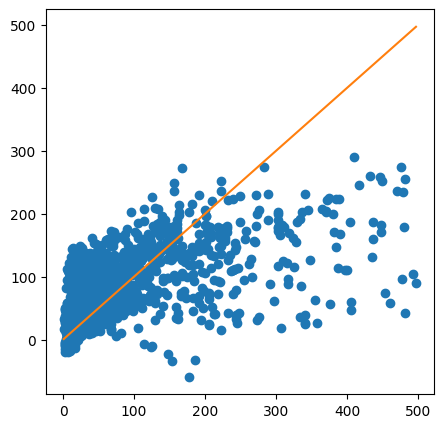


Intercept: 75.25936669583427
Intercept: [ -1.55027746   0.59654519 -24.35866462  -9.79121323   8.98022
   5.40957972  22.72996291  40.80839048  -1.00807422  -0.94017068
   1.16571057   2.34647179   0.36929402   9.24333075 -26.57920031
  -4.8439865  -15.26124184  -8.9933069   -0.56345565  -0.38209892
   0.04411281  24.8699495 ]


In [65]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
lr = LinearRegression() #Pipeline([('std_scaler', StandardScaler()),('linear_regressor',LinearRegression(normalize=True,fit_intercept=False))])
lr.fit(x_train, y_train)
print("linear regression")
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test , y_pred)                     #Mean squared error
rmse = np.sqrt(mse)                                           #root mean squared error
reg_score = r2_score(y_test , y_pred)                         #reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        #mean absolute percentage error
mae = mean_absolute_error(y_test , y_pred)                    #mean absolute error
print('Reg_score:', reg_score )
print('Mean Squared Error:', mse)
print('Mean absolute percentage error:', mape )
print('Mean absolute error:', mae)
print('rmse:', rmse)
fig = py.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
py.show()
print()
print('Intercept:',lr.intercept_)
print('Intercept:',lr.coef_)

Lasso Regression
0.36906975153708044
0.3715963183040414
Reg_score: 0.3715963183040414
Mean Squared Error: 5544.401390065489
Mean absolute percentage error: 1.3743020103806538
Mean absolute error: 46.640969460339164
rmse: 74.46073723826194


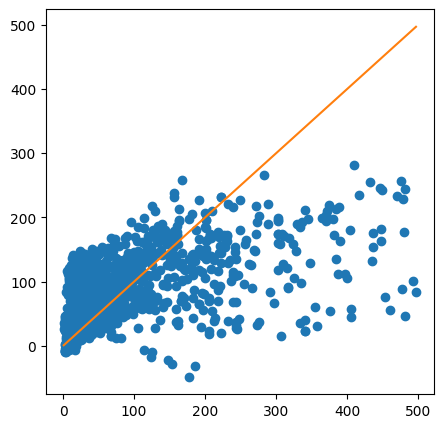

In [66]:
from sklearn.linear_model import LassoLars
lasso = LassoLars()
lasso.fit(x_train,y_train)
print('Lasso Regression')
print(lasso.score(x_train,y_train))
print(lasso.score(x_test , y_test))
y_pred = lasso.predict(x_test)
mse = mean_squared_error(y_test , y_pred)                     #Mean squared error
rmse = np.sqrt(mse)                                           #root mean squared error
reg_score = r2_score(y_test , y_pred)                         #reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        #mean absolute percentage error
mae = mean_absolute_error(y_test , y_pred)                    #mean absolute error
print('Reg_score:', reg_score )
print('Mean Squared Error:', mse)
print('Mean absolute percentage error:', mape )
print('Mean absolute error:', mae)
print('rmse:', rmse)
fig = py.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
py.show()
print()

DT
0.5776206677700422
0.4107205936044328
Reg_score: 0.4107205936044328
Mean Squared Error: 5199.208176404866
Mean absolute percentage error: 1.070955191835075
Mean absolute error: 43.13143861367087
rmse: 72.10553499146141


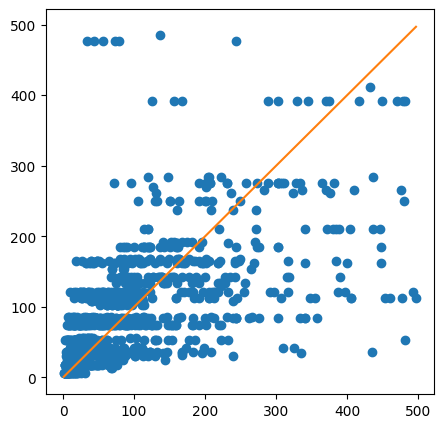

In [67]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth= 6, max_features= 7, min_samples_split= 10, random_state= 2)
param_grid = {"max_depth": [3, None,6,9],
              "max_features": [5, 7,11, 15],
              "min_samples_split": [2, 3, 10],
             "random_state":[2,4,6]}
grid = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 5)
grid_result = grid.fit(x_train, y_train)
dt.fit(x_train,y_train)
print('DT')
print(dt.score(x_train,y_train))
print(dt.score(x_test , y_test))
y_pred = dt.predict(x_test)
mse = mean_squared_error(y_test , y_pred)                     #Mean squared error
rmse = np.sqrt(mse)                                           #root mean squared error
reg_score = r2_score(y_test , y_pred)                         #reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        #mean absolute percentage error
mae = mean_absolute_error(y_test , y_pred)                    #mean absolute error
print('Reg_score:', reg_score )
print('Mean Squared Error:', mse)
print('Mean absolute percentage error:', mape )
print('Mean absolute error:', mae)
print('rmse:', rmse)
fig = py.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
py.show()
print()

RF
0.5505434679141394
0.5307359831365005
Reg_score: 0.5307359831365005
Mean Squared Error: 4140.313214562814
Mean absolute percentage error: 1.3589226059731514
Mean absolute error: 40.23494826586728
rmse: 64.34526567326313


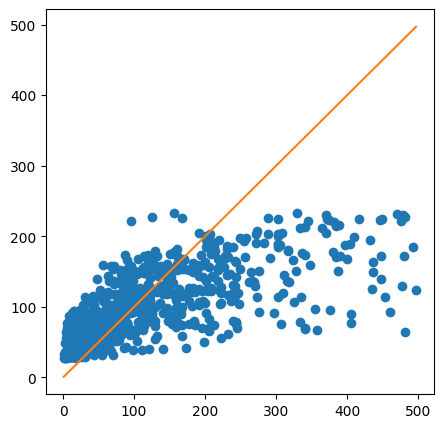

In [68]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth= 4 , max_features= 6)
rf.fit(x_train,y_train)
print('RF')
print(rf.score(x_train,y_train))
print(rf.score(x_test , y_test))
y_pred = rf.predict(x_test)
mse = mean_squared_error(y_test , y_pred)                     #Mean squared error
rmse = np.sqrt(mse)                                           #root mean squared error
reg_score = r2_score(y_test , y_pred)                         #reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        #mean absolute percentage error
mae = mean_absolute_error(y_test , y_pred)                    #mean absolute error
print('Reg_score:', reg_score )
print('Mean Squared Error:', mse)
print('Mean absolute percentage error:', mape )
print('Mean absolute error:', mae)
print('rmse:', rmse)
fig = py.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
py.show()
print()

# Model Comparison

In [69]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "RMSE": round(rmse, 2),
        "R² Score": round(r2, 3)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="RMSE"))

               Model   RMSE  R² Score
4      Random Forest  53.29     0.678
3      Decision Tree  57.84     0.621
0  Linear Regression  74.23     0.375
1              Ridge  74.23     0.376
2              Lasso  74.25     0.375


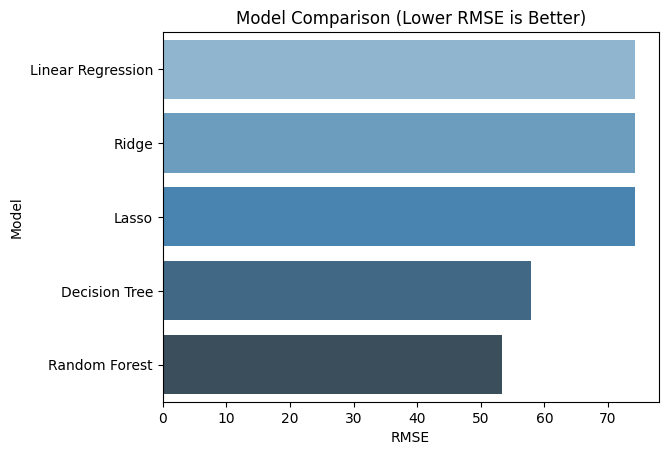

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add hue equal to 'Model', and set legend=False
sns.barplot(data=results_df, x="RMSE", y="Model", hue="Model", palette="Blues_d", legend=False)
plt.title("Model Comparison (Lower RMSE is Better)")
plt.xlabel("RMSE")
plt.ylabel("Model")
plt.show()